<a href="https://colab.research.google.com/github/roghit192121011/CSA5401-A/blob/main/CSA5401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subnet 0: 192.168.1.0/26 (64 addresses)
Subnet 1: 192.168.1.64/26 (64 addresses)
Subnet 2: 192.168.1.128/26 (64 addresses)
Subnet 3: 192.168.1.192/26 (64 addresses)


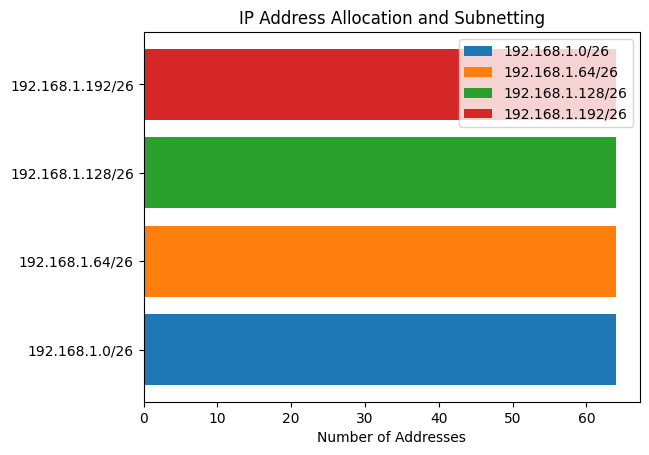

In [ ]:
#EX1.Analyze and Visualize IP Address Allocation and Subnetting
import ipaddress
import matplotlib.pyplot as plt

# Define the IP network
network = ipaddress.ip_network('192.168.1.0/24')

# List all subnets
subnets = list(network.subnets(prefixlen_diff=2))  # Split into 4 subnets

# Visualize subnets
fig, ax = plt.subplots()
for i, subnet in enumerate(subnets):
    ax.barh(i, subnet.num_addresses, label=f"{subnet}")
    print(f"Subnet {i}: {subnet} ({subnet.num_addresses} addresses)")

ax.set_yticks(range(len(subnets)))
ax.set_yticklabels([str(subnet) for subnet in subnets])
ax.set_xlabel("Number of Addresses")
ax.set_title("IP Address Allocation and Subnetting")
plt.legend()
plt.show()

In [ ]:
#EX2.Read and Modify Linux Network Configuration Files
def read_file(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

def write_file(file_path, lines):
    with open(file_path, 'w') as file:
        file.writelines(lines)

def modify_hosts():
    file_path = '/etc/hosts'
    lines = read_file(file_path)
    lines.append("192.168.1.100 mycustomhost\n")  # Add a new entry
    write_file(file_path, lines)

def modify_resolv_conf():
    file_path = '/etc/resolv.conf'
    lines = read_file(file_path)
    lines.append("nameserver 8.8.8.8\n")  # Add Google DNS
    write_file(file_path, lines)

def modify_interfaces():
    file_path = '/etc/network/interfaces'
    lines = read_file(file_path)
    lines.append("auto eth1\niface eth1 inet dhcp\n")  # Add a new interface
    write_file(file_path, lines)

# Example usage
modify_hosts()
modify_resolv_conf()
modify_interfaces()

FileNotFoundError: [Errno 2] No such file or directory: '/etc/network/interfaces'

In [ ]:
#Ex3.Capture and Analyze Active TCP/IP Daemons
import psutil
import os

def get_active_connections():
    connections = psutil.net_connections(kind='tcp')
    for conn in connections:
        print(f"PID: {conn.pid}, Name: {psutil.Process(conn.pid).name()}, Status: {conn.status}, Local: {conn.laddr}, Remote: {conn.raddr}")

def netstat_analysis():
    os.system("netstat -tuln")  # Run netstat command

# Example usage
get_active_connections()
netstat_analysis()

PID: 24, Name: kernel_manager_proxy, Status: ESTABLISHED, Local: addr(ip='172.28.0.12', port=60868), Remote: addr(ip='172.28.0.12', port=9000)
PID: None, Name: python3, Status: LISTEN, Local: addr(ip='127.0.0.11', port=39225), Remote: ()
PID: 24, Name: kernel_manager_proxy, Status: LISTEN, Local: addr(ip='172.28.0.12', port=6000), Remote: ()
PID: 452, Name: python3, Status: LISTEN, Local: addr(ip='127.0.0.1', port=34705), Remote: ()
PID: None, Name: python3, Status: TIME_WAIT, Local: addr(ip='172.28.0.12', port=6000), Remote: addr(ip='172.28.0.12', port=55148)
PID: None, Name: python3, Status: TIME_WAIT, Local: addr(ip='172.28.0.12', port=6000), Remote: addr(ip='172.28.0.12', port=53420)
PID: 420, Name: python3, Status: LISTEN, Local: addr(ip='127.0.0.1', port=41767), Remote: ()
PID: 87, Name: jupyter-noteboo, Status: ESTABLISHED, Local: addr(ip='172.28.0.12', port=9000), Remote: addr(ip='172.28.0.12', port=58826)
PID: None, Name: python3, Status: TIME_WAIT, Local: addr(ip='172.28.0.12

In [ ]:
#Ex4.Simple Python-Based Network Daemon
import socket
import logging

# Configure logging
logging.basicConfig(filename='daemon.log', level=logging.INFO, format='%(asctime)s - %(message)s')

def start_daemon(port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as server_socket:
        server_socket.bind(('0.0.0.0', port))
        server_socket.listen(5)
        logging.info(f"Daemon started on port {port}")

        while True:
            client_socket, addr = server_socket.accept()
            logging.info(f"Connection from {addr}")
            client_socket.close()

if __name__ == "__main__":
    start_daemon(8080)  # Change port as needed

OSError: [Errno 98] Address already in use

In [ ]:
#Ex5.Scan and List Open Ports on a Target Machine
import socket
import matplotlib
import nmap

# Using socket for basic port scanning
def scan_ports(host, start_port, end_port):
    open_ports = []
    for port in range(start_port, end_port + 1):
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.settimeout(1)
        result = sock.connect_ex((host, port))
        if result == 0:
            open_ports.append(port)
        sock.close()
    return open_ports

# Using nmap for advanced scanning
def nmap_scan(host):
    nm = nmap.PortScanner()
    nm.scan(host, arguments='-p 1-1024')
    return nm[host]['tcp'].keys()

if __name__ == "__main__":
    target = "127.0.0.1"  # Change to target IP
    print("Basic Scan:", scan_ports(target, 1, 1024))
    print("Nmap Scan:", nmap_scan(target))

ModuleNotFoundError: No module named 'nmap'

In [2]:
#Ex6.extract and display IP addresses, subnet masks, and default
import java.net.*;
import java.util.*;
public class NetworkDetails {
 public static void main(String[] args) {
 try {
 Enumeration<NetworkInterface> interfaces =
NetworkInterface.getNetworkInterfaces();
 while (interfaces.hasMoreElements()) {
 NetworkInterface network = interfaces.nextElement();
 System.out.println("Interface: " +
network.getDisplayName());
 Enumeration<InetAddress> addresses =
network.getInetAddresses();
 while (addresses.hasMoreElements()) {
 InetAddress address = addresses.nextElement();
System.out.println(" IP Address: " +
address.getHostAddress());
 }
 }
 } catch (SocketException e) {
 e.printStackTrace();
 }
 }
}


SyntaxError: invalid syntax (<ipython-input-2-7f72a3863a23>, line 2)

In [8]:
#EX7. Implement a Python script to log all incoming and outgoing network
import psutil
import time
import csv

def log_connections(log_file="network_connections.csv"):
    with open(log_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Timestamp", "PID", "Local Address", "Remote Address", "Status", "Process Name"])

        while True:
            for conn in psutil.net_connections(kind='inet'):
                try:
                    laddr = f"{conn.laddr.ip}:{conn.laddr.port}" if conn.laddr else "N/A"
                    raddr = f"{conn.raddr.ip}:{conn.raddr.port}" if conn.raddr else "N/A"
                    process = psutil.Process(conn.pid).name() if conn.pid else "N/A"
                    writer.writerow([time.strftime("%Y-%m-%d %H:%M:%S"), conn.pid, laddr, raddr, conn.status, process])
                except (psutil.NoSuchProcess, psutil.AccessDenied):
                    continue
            time.sleep(5)  # Log every 5 seconds

if __name__ == "__main__":
    log_connections()


KeyboardInterrupt: 

In [9]:
#Ex8.monitoring tool to detect unauthorized changes to system network
import hashlib
import time

# List of files to monitor
FILES_TO_MONITOR = ["/etc/network/interfaces", "/etc/resolv.conf"]

def get_file_hash(filepath):
    """Returns the SHA256 hash of the file contents."""
    try:
        with open(filepath, 'rb') as file:
            file_contents = file.read()
            return hashlib.sha256(file_contents).hexdigest()
    except FileNotFoundError:
        return None

def monitor_files(interval=10):
    """Continuously monitors the files for unauthorized changes."""
    file_hashes = {file: get_file_hash(file) for file in FILES_TO_MONITOR}

    print("Monitoring started. Press Ctrl+C to stop.")

    try:
        while True:
            time.sleep(interval)

            for file in FILES_TO_MONITOR:
                new_hash = get_file_hash(file)
                if new_hash is None:
                    print(f"[ALERT] {file} has been deleted!")
                elif new_hash != file_hashes[file]:
                    print(f"[WARNING] Unauthorized change detected in {file}!")
                    file_hashes[file] = new_hash  # Update stored hash
    except KeyboardInterrupt:
        print("Monitoring stopped.")

if __name__ == "__main__":
    monitor_files()


Monitoring started. Press Ctrl+C to stop.
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] /etc/network/interfaces has been deleted!
[ALERT] 

In [10]:
#Ex9. Develop a Python script to encrypt and decrypt files before transferring them over FTP
from Crypto.Cipher import AES
import os

def pad(data):
    """Pads data to make it AES block size compliant."""
    padding_length = 16 - (len(data) % 16)
    return data + bytes([padding_length] * padding_length)

def unpad(data):
    """Removes padding from data."""
    padding_length = data[-1]
    return data[:-padding_length]

def encrypt_file(input_file, output_file, key):
    """Encrypts a file using AES encryption."""
    cipher = AES.new(key, AES.MODE_ECB)
    with open(input_file, 'rb') as f:
        plaintext = f.read()
    ciphertext = cipher.encrypt(pad(plaintext))
    with open(output_file, 'wb') as f:
        f.write(ciphertext)
    print(f"File {input_file} encrypted successfully as {output_file}.")

def decrypt_file(input_file, output_file, key):
    """Decrypts a file using AES encryption."""
    cipher = AES.new(key, AES.MODE_ECB)
    with open(input_file, 'rb') as f:
        ciphertext = f.read()
    plaintext = unpad(cipher.decrypt(ciphertext))
    with open(output_file, 'wb') as f:
        f.write(plaintext)
    print(f"File {input_file} decrypted successfully as {output_file}.")

# Example Usage
key = b"thisisaverysecurekey"[:16]  # Ensure 16 bytes long

# Encrypt: encrypt_file("sample.txt", "sample_encrypted.bin", key)
# Decrypt: decrypt_file("sample_encrypted.bin", "sample_decrypted.txt", key)

ModuleNotFoundError: No module named 'Crypto'

In [11]:
#Ex10.Implement a Python-based SSH brute-force attack detection system using paramiko
import paramiko
import socket
import logging

# Configure logging
logging.basicConfig(filename="ssh_brute_force.log", level=logging.INFO,
                    format="%(asctime)s - %(message)s")

def detect_brute_force_attempts(server_ip, port, username, password_list):
    """Detects failed SSH login attempts using Paramiko."""
    for password in password_list:
        try:
            client = paramiko.SSHClient()
            client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
            client.connect(server_ip, port=port, username=username,
                           password=password, timeout=5)
            client.close()
            print("Login successful with password:", password)
            break
        except paramiko.AuthenticationException:
            logging.info(f"Failed login attempt for {username} with password: {password}")
            print("Failed login attempt detected.")
        except socket.error:
            logging.error("Connection error occurred.")
            break

# Example usage
server_ip = "192.168.1.1"
port = 22
username = "admin"
password_list = ["password123", "admin123", "letmein", "123456"]
detect_brute_force_attempts(server_ip, port, username, password_list)

ModuleNotFoundError: No module named 'paramiko'

In [13]:
#Ex11. Write a Java program to implement a secure login system using Java Security
import java.io.*;
import java.security.AccessControlException;
import java.util.Scanner;

public class SecureLogin {
    public static void main(String[] args) {
        System.setSecurityManager(new SecurityManager());
        String correctUsername = "admin";
        String correctPassword = "password123";

        Scanner scanner = new Scanner(System.in);
        System.out.print("Enter username: ");
        String username = scanner.nextLine();
        System.out.print("Enter password: ");
        String password = scanner.nextLine();

        if (username.equals(correctUsername) && password.equals(correctPassword)) {
            System.out.println("Login Successful!");
            try {
                FileWriter writer = new FileWriter("login.txt", true);
                writer.write("User " + username + " logged in successfully.\n");
                writer.close();
            } catch (AccessControlException e) {
                System.out.println("Security Exception: File write access denied!");
            } catch (IOException e) {
                e.printStackTrace();
            }
        } else {
            System.out.println("Invalid Credentials!");
        }
        scanner.close();
    }
}

SyntaxError: invalid syntax (<ipython-input-13-64bb9174869e>, line 2)

In [14]:
#Ex12.Java HTTPS server using Java's SSL libraries to encrypt client-server communication.
import com.sun.net.httpserver.HttpServer;
import com.sun.net.httpserver.HttpsConfigurator;
import com.sun.net.httpserver.HttpsServer;
import javax.net.ssl.*;
import java.io.IOException;
import java.io.OutputStream;
import java.net.InetSocketAddress;
import java.security.KeyStore;
import java.io.FileInputStream;

public class HttpsServerExample {
    public static void main(String[] args) throws Exception {
        // Load the keystore
        char[] password = "password".toCharArray();
        KeyStore ks = KeyStore.getInstance("JKS");
        FileInputStream fis = new FileInputStream("keystore.jks");
        ks.load(fis, password);

        // Set up the KeyManager
        KeyManagerFactory kmf = KeyManagerFactory.getInstance("SunX509");
        kmf.init(ks, password);

        // Set up the SSL context
        SSLContext sslContext = SSLContext.getInstance("TLS");
        sslContext.init(kmf.getKeyManagers(), null, null);

        // Create HTTPS server
        HttpsServer server = HttpsServer.create(new InetSocketAddress(8443), 0);
        server.setHttpsConfigurator(new HttpsConfigurator(sslContext));

        server.createContext("/test", exchange -> {
            String response = "Hello, Secure World!";
            exchange.sendResponseHeaders(200, response.length());
            OutputStream os = exchange.getResponseBody();
            os.write(response.getBytes());
            os.close();
        });

        server.setExecutor(null);
        server.start();
        System.out.println("HTTPS server started on port 8443");
    }
}

SyntaxError: invalid syntax (<ipython-input-14-c7a4efcd9157>, line 5)

In [ ]:
#EX13. Implement AES encryption in a Java app to securely store and retrieve sensitive data.
import javax.crypto.Cipher;
import javax.crypto.KeyGenerator;
import javax.crypto.SecretKey;
import java.util.Base64;

public class AESEncryption {
    private static final String AES_ALGORITHM = "AES";

    // Generate AES Secret Key
    public static SecretKey generateKey() throws Exception {
        KeyGenerator keyGenerator = KeyGenerator.getInstance(AES_ALGORITHM);
        keyGenerator.init(128); // AES key size
        return keyGenerator.generateKey();
    }

    // Encrypt data using AES
    public static String encrypt(String data, SecretKey key) throws Exception {
        Cipher cipher = Cipher.getInstance(AES_ALGORITHM);
        cipher.init(Cipher.ENCRYPT_MODE, key);
        byte[] encryptedBytes = cipher.doFinal(data.getBytes());
        return Base64.getEncoder().encodeToString(encryptedBytes);
    }

    // Decrypt data using AES
    public static String decrypt(String encryptedData, SecretKey key) throws Exception {
        Cipher cipher = Cipher.getInstance(AES_ALGORITHM);
        cipher.init(Cipher.DECRYPT_MODE, key);
        byte[] decryptedBytes = cipher.doFinal(Base64.getDecoder().decode(encryptedData));
        return new String(decryptedBytes);
    }

    public static void main(String[] args) throws Exception {
        SecretKey key = generateKey();
        String originalData = "SensitiveData123";

        String encryptedData = encrypt(originalData, key);
        System.out.println("Encrypted Data: " + encryptedData);

        String decryptedData = decrypt(encryptedData, key);
        System.out.println("Decrypted Data: " + decryptedData);
    }
}

In [15]:
#Ex14.integrity of a downloaded file using a SHA-256 checksum.
import java.io.File;
import java.io.FileInputStream;
import java.security.MessageDigest;
import java.util.Formatter;

public class FileChecksum {
    public static String calculateSHA256(File file) throws Exception {
        MessageDigest digest = MessageDigest.getInstance("SHA-256");
        FileInputStream fis = new FileInputStream(file);
        byte[] byteArray = new byte[1024];
        int bytesRead;
        while ((bytesRead = fis.read(byteArray)) != -1) {
            digest.update(byteArray, 0, bytesRead);
        }
        fis.close();
        byte[] hashBytes = digest.digest();
        return bytesToHex(hashBytes);
    }

    private static String bytesToHex(byte[] bytes) {
        Formatter formatter = new Formatter();
        for (byte b : bytes) {
            formatter.format("%02x", b);
        }
        String result = formatter.toString();
        formatter.close();
        return result;
    }

    public static void main(String[] args) throws Exception {
        File file = new File("sample.txt"); // Replace with actual file path
        String checksum = calculateSHA256(file);
        System.out.println("SHA-256 Checksum: " + checksum);
    }
}

SyntaxError: invalid syntax (<ipython-input-15-f6a55eb98400>, line 7)

In [16]:
#Ex15.Java program that implements RSA encryption and decryption for secure data transfer.
import java.security.*;
import javax.crypto.Cipher;
import java.util.Base64;

public class RSAEncryption {
    private static KeyPair generateKeyPair() throws Exception {
        KeyPairGenerator keyPairGenerator = KeyPairGenerator.getInstance("RSA");
        keyPairGenerator.initialize(2048);
        return keyPairGenerator.generateKeyPair();
    }

    public static String encrypt(String data, PublicKey publicKey) throws Exception {
        Cipher cipher = Cipher.getInstance("RSA");
        cipher.init(Cipher.ENCRYPT_MODE, publicKey);
        byte[] encryptedBytes = cipher.doFinal(data.getBytes());
        return Base64.getEncoder().encodeToString(encryptedBytes);
    }

    public static String decrypt(String encryptedData, PrivateKey privateKey) throws Exception {
        Cipher cipher = Cipher.getInstance("RSA");
        cipher.init(Cipher.DECRYPT_MODE, privateKey);
        byte[] decryptedBytes = cipher.doFinal(Base64.getDecoder().decode(encryptedData));
        return new String(decryptedBytes);
    }

    public static void main(String[] args) throws Exception {
        KeyPair keyPair = generateKeyPair();
        String originalData = "SecureMessage123";

        String encryptedData = encrypt(originalData, keyPair.getPublic());
        System.out.println("Encrypted Data: " + encryptedData);

        String decryptedData = decrypt(encryptedData, keyPair.getPrivate());
        System.out.println("Decrypted Data: " + decryptedData);
    }
}


SyntaxError: invalid syntax (<ipython-input-16-b22544002ac2>, line 2)

In [17]:
#Ex16.secure authentication system that uses hashed passwords with salting for user login.
import java.security.SecureRandom;
import java.security.MessageDigest;
import java.security.NoSuchAlgorithmException;
import java.util.Base64;

public class PasswordHasher {
    private static final SecureRandom RANDOM = new SecureRandom();

    public static String generateSalt() {
        byte[] salt = new byte[16];
        RANDOM.nextBytes(salt);
        return Base64.getEncoder().encodeToString(salt);
    }

    public static String hashPassword(String password, String salt) throws NoSuchAlgorithmException {
        MessageDigest md = MessageDigest.getInstance("SHA-256");
        md.update(salt.getBytes());
        byte[] hashedPassword = md.digest(password.getBytes());
        return Base64.getEncoder().encodeToString(hashedPassword);
    }

    public static void main(String[] args) {
        try {
            String salt = generateSalt();
            String password = "mySecurePassword123";

            String hashedPassword = hashPassword(password, salt);
            System.out.println("Salt: " + salt);
            System.out.println("Hashed Password: " + hashedPassword);
        } catch (NoSuchAlgorithmException e) {
            System.err.println("SHA-256 algorithm not available: " + e.getMessage());
        }
    }
}



SyntaxError: invalid syntax (<ipython-input-17-ef7a306cc9de>, line 7)

In [18]:
#Ex17.Implement and compare hash functions (MD5, SHA-256, SHA-512) using a Python
import hashlib
def compute_hash(file_path):
 hashes = {"MD5": "", "SHA-256": "", "SHA-512": ""}
 with open(file_path, 'rb') as file:
 file_data = file.read()

 md5_hash = hashlib.md5()
 md5_hash.update(file_data)
 hashes["MD5"] = md5_hash.hexdigest()

 sha256_hash = hashlib.sha256()
 sha256_hash.update(file_data)
 hashes["SHA-256"] = sha256_hash.hexdigest()

 sha512_hash = hashlib.sha512()
 sha512_hash.update(file_data)
 hashes["SHA-512"] = sha512_hash.hexdigest()
 return hashes

def compare_hashes(hashes):
 print(f"MD5 Hash: {hashes['MD5']}")
 print(f"SHA-256 Hash: {hashes['SHA-256']}")
 print(f"SHA-512 Hash: {hashes['SHA-512']}")
# Main function to test the hash functions
if __name__ == "__main__":
 file_path = input("Enter the path of the file to hash: ")
 hashes = compute_hash(file_path)
 compare_hashes(hashes)

IndentationError: expected an indented block after 'with' statement on line 5 (<ipython-input-18-c562f784ddce>, line 6)

In [19]:
#Ex18.Python program to generate an HMAC-based authentication system using the hmac module.
import hmac
import hashlib

SECRET_KEY = b'supersecretkey'

def generate_hmac(message, key):
    return hmac.new(key, message.encode(), hashlib.sha256).hexdigest()

def verify_hmac(message, key, expected_hmac):
    generated_hmac = generate_hmac(message, key)
    return hmac.compare_digest(generated_hmac, expected_hmac)

# Simulating a basic authentication process
def authenticate_user(username, password):

    stored_password_hash = generate_hmac("userpassword", SECRET_KEY)

    provided_password_hash = generate_hmac(password, SECRET_KEY)

    if verify_hmac(password, SECRET_KEY, stored_password_hash):
        print("Authentication Successful!")
        return True
    else:
        print("Authentication Failed!")
        return False

if __name__ == "__main__":
    print("Welcome to the Secure Authentication System!")

    username = input("Enter username: ")
    password = input("Enter password: ")

    # Authenticate the user with HMAC
    authenticate_user(username, password)

Welcome to the Secure Authentication System!
Enter username: roghit123
Enter password: 1235
Authentication Failed!


In [ ]:
#Ex19.Python script to create and verify digital signatures using the PyCryptodome library.
from Crypto.PublicKey import RSA
from Crypto.Signature import pkcs1_15
from Crypto.Hash import SHA256
import binascii

# Function to generate RSA key pair
def generate_keys():
    key = RSA.generate(2048)  # 2048-bit RSA key
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

# Function to create a digital signature
def create_signature(message, private_key):
    # Hash the message using SHA-256
    h = SHA256.new(message.encode())
    # Load the private key
    private_key_obj = RSA.import_key(private_key)
    # Create the signature using the private key and hashed message
    signature = pkcs1_15.new(private_key_obj).sign(h)
    return signature

# Function to verify the digital signature
def verify_signature(message, signature, public_key):
    # Hash the message
    h = SHA256.new(message.encode())
    # Load the public key
    public_key_obj = RSA.import_key(public_key)
    try:
        # Verify the signature using the public key
        pkcs1_15.new(public_key_obj).verify(h, signature)
        print("Signature is valid!")
    except (ValueError, TypeError):
        print("Signature verification failed!")

# Main function
if __name__ == "__main__":
    # Step 1: Generate RSA keys
    private_key, public_key = generate_keys()

    # Step 2: Define a message
    message = "This is a secret message!"

    # Step 3: Create a digital signature for the message
    print(f"Original Message: {message}")
    signature = create_signature(message, private_key)

    # Print the signature (in hexadecimal format)
    print(f"Digital Signature: {binascii.hexlify(signature).decode()}")

    # Step 4: Verify the digital signature
    print("\nVerifying the signature with the public key...")
    verify_signature(message, signature, public_key)

In [20]:
#Ex20.challenge-response authentication system in Python using one-time passwords.
 import secrets

# Secret key for OTP generation (in real-world applications, this should be securely stored)
SECRET_KEY = "SuperSecretKey"

# Function to generate a one-time password (OTP) based on a secret key and challenge
def generate_otp(challenge, secret_key):
    # Combine the challenge and secret key to generate a secure OTP
    otp_input = challenge + secret_key
    otp = secrets.token_hex(4)  # Generate a 4-byte OTP (8 hex characters)
    return otp

# Server-side function to generate the challenge and OTP
def server_generate_challenge():
    challenge = secrets.token_hex(4)  # Generate a random challenge (4-byte random string)
    otp = generate_otp(challenge, SECRET_KEY)
    return challenge, otp

# Client-side function to respond with OTP
def client_respond(challenge, otp):
    # The client would typically generate the OTP based on the secret key and challenge
    # Here, for simplicity, we're directly passing the correct OTP
    return otp

# Function to simulate the challenge-response authentication process
def authenticate_user():
    print("Welcome to the Secure OTP Authentication System!")

    # Server generates a challenge and OTP
    challenge, correct_otp = server_generate_challenge()

    # Server displays the challenge (this would be shown to the client)
    print(f"Challenge: {challenge}")

    # Simulating the client receiving the challenge and generating the response (OTP)
    client_otp = client_respond(challenge, correct_otp)

    # Server verifies the client's response
    if client_otp == correct_otp:
        print("Authentication Successful!")
    else:
        print("Authentication Failed!")

# Main function
if __name__ == "__main__":
    authenticate_user()

IndentationError: unexpected indent (<ipython-input-20-c5ab0a2c44f5>, line 2)